In [2]:
from pbcpy.grid import Plot
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
from pbcpy.base import Coord
from pbcpy.base import Cell
from pbcpy.base import Cell
from pbcpy.grid import Grid
import numpy as np
from pbcpy.base import pbcarray
from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
import  matplotlib.pyplot as plt
import matplotlib as mpl

#### Vacuum reference:

In [3]:
map_2 = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl2_map_vtot.pp').read()
map_2_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl2_map_charged_vtot.pp').read()

In [4]:
map_16 = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl16_map_vtot.pp').read()
map_16_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl16_map_charged_vtot.pp').read()

In [5]:
map_54 = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl54_map_vtot.pp').read()
map_54_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl54_map_charged_vtot.pp').read()

In [6]:
map_128 = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl128_map_vtot.pp').read()
map_128_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Vacuum_ref/NaCl128_map_vtot_charged.pp').read()

[-5.20052632  5.20052632  5.20052632] label0 Cl
[-5.20052631  5.20052631  5.20052631] label1 Cl
[-5.20052632  5.20052632  5.20052632] label2 Cl
[-5.20052631  5.20052631  5.20052631] label3 Cl


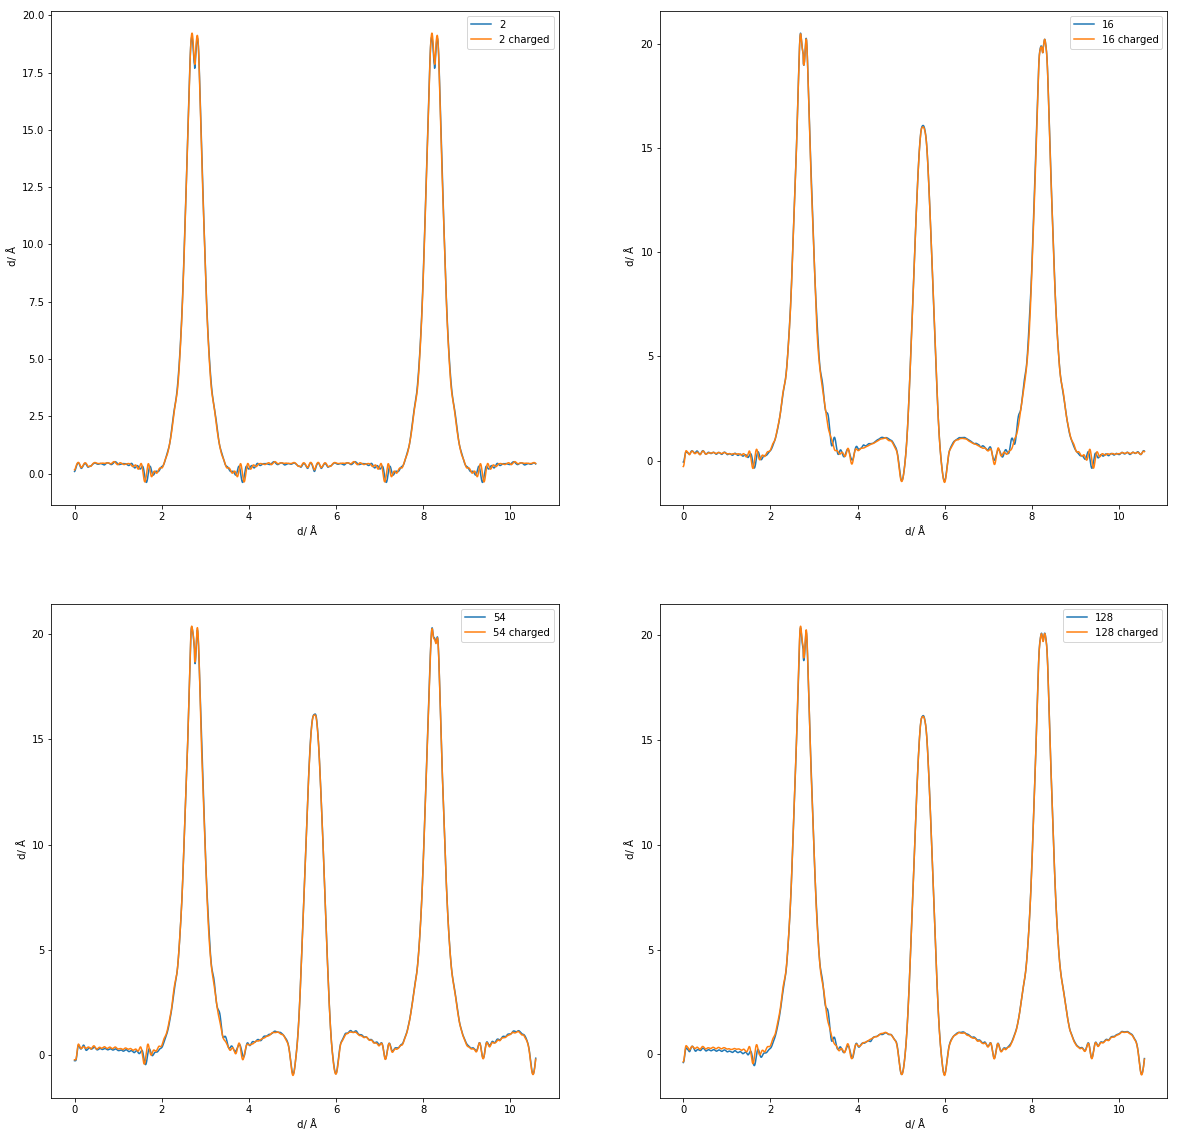

In [7]:
mpl.rcParams['figure.figsize'] = (20,20)
distance_scalar = 20

x0 = map_2.ions[0].pos
x1 = map_16.ions[0].pos
x2 = map_54.ions[0].pos
x3 = map_128.ions[0].pos

r0 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_2.cell)
r1 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_16.cell)
r2 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_54.cell)
r3 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_128.cell)

print(x1, 'label0', map_2.ions[0].label)
print(x2, 'label1', map_16.ions[0].label)
print(x1, 'label2', map_54.ions[0].label)
print(x2, 'label3', map_128.ions[0].label)

gridpoints = 4000
d0 = (r0).length()*0.52918
d1 = (r1).length()*0.52918
d2 = (r2).length()*0.52918
d3 = (r3).length()*0.52918

scalar0 = d0/gridpoints
scalar1 = d1/gridpoints
scalar2 = d2/gridpoints
scalar3 = d3/gridpoints

xvalues = np.arange(0,gridpoints,1)

fig, axes = plt.subplots(nrows=2, ncols=2)

plotcut_1D_map_2 = map_2.plot.get_plotcut(x0=x0,r0=r0, nr=gridpoints)
plotcut_1D_map_16 = map_16.plot.get_plotcut(x0=x1,r0=r1, nr=gridpoints)
plotcut_1D_map_54 = map_54.plot.get_plotcut(x0=x2,r0=r2, nr=gridpoints)
plotcut_1D_map_128 = map_128.plot.get_plotcut(x0=x3,r0=r3, nr=gridpoints)
plotcut_1D_map_2_charged = map_2_charged.plot.get_plotcut(x0=x0,r0=r0, nr=gridpoints)
plotcut_1D_map_16_charged = map_16_charged.plot.get_plotcut(x0=x1,r0=r1, nr=gridpoints)
plotcut_1D_map_54_charged = map_54_charged.plot.get_plotcut(x0=x2,r0=r2, nr=gridpoints)
plotcut_1D_map_128_charged = map_128_charged.plot.get_plotcut(x0=x3,r0=r3, nr=gridpoints)

axes[0][0].plot(xvalues*scalar0, plotcut_1D_map_2.values, label = '2')
axes[0][1].plot(xvalues*scalar1, plotcut_1D_map_16.values, label = '16')
axes[1][0].plot(xvalues*scalar2, plotcut_1D_map_54.values, label = '54')
axes[1][1].plot(xvalues*scalar3, plotcut_1D_map_128.values, label = '128')

axes[0][0].plot(xvalues*scalar0, plotcut_1D_map_2_charged.values, label = '2 charged')
axes[0][1].plot(xvalues*scalar1, plotcut_1D_map_16_charged.values, label = '16 charged')
axes[1][0].plot(xvalues*scalar2, plotcut_1D_map_54_charged.values, label = '54 charged')
axes[1][1].plot(xvalues*scalar3, plotcut_1D_map_128_charged.values, label = '128 charged')

axes[0][0].set_xlabel(' d/ Å')
axes[0][1].set_xlabel(' d/ Å')
axes[1][0].set_xlabel(' d/ Å')
axes[1][1].set_xlabel(' d/ Å')

axes[0][0].set_ylabel(' d/ Å')
axes[0][1].set_ylabel(' d/ Å')
axes[1][0].set_ylabel(' d/ Å')
axes[1][1].set_ylabel(' d/ Å')

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

plt.show()

## Embedding potential v_emb(r) with rho_N

In [36]:
valence_electrons_Cl = 7
ry_to_ev = 13.6057
v_2 = 281.3014
v_16 = 2250.4112
v_54 = 7595.1378
v_128 = 18003.2895
nnr_2 = 72*72*72
nnr_16 = 135*135*135
nnr_54 = 200*200*200
nnr_128 = 269*269*269 

In [42]:
delta_128 = map_128_charged.plot.get_value_at_points(points=np.asarray([[0.125,0.125,0.125],])) - map_128.plot.get_value_at_points(points=np.asarray([[0.125,0.125,0.125],]))
delta_128*valence_electrons_Cl*(v_128/nnr_128)*ry_to_ev

array([ 0.00333336])

In [43]:
delta_54 = map_54_charged.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.166666666667,0.166666666667],])) - map_54.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.1666666666,0.166666666667],]))
delta_54*valence_electrons_Cl*(v_54/nnr_54)*ry_to_ev

array([ 0.00382113])

In [44]:
delta_16 = map_16_charged.plot.get_value_at_points(points=np.asarray([[0.25,0.25,0.25],])) - map_16.plot.get_value_at_points(points=np.asarray([[0.25,0.25,0.25],]))
delta_16*valence_electrons_Cl*(v_16/nnr_16)*ry_to_ev

array([-0.01857808])

In [45]:
delta_2 = map_2_charged.plot.get_value_at_points(points=np.asarray([[0.5,0.5,0.5],])) - map_2.plot.get_value_at_points(points=np.asarray([[0.5,0.5,0.5],]))
delta_2*valence_electrons_Cl*(v_2/nnr_2)*ry_to_ev

array([ 0.00490272])

#### Crystal reference

In [7]:
map_2 = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl2_map_vtot.pp').read()
map_2_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl2_map_charged_vtot.pp').read()

In [8]:
map_16 = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl16_map_vtot.pp').read()
map_16_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl16_map_charged_vtot.pp').read()

In [9]:
map_54 = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl54_map_vtot.pp').read()
map_54_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl54_map_charged_vtot.pp').read()

In [10]:
map_128 = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl128_map_vtot.pp').read()
map_128_charged = PP('/home/johannes/nm3/NaCl/emb_pot/Crystal_ref/NaCl128_map_charged_vtot.pp').read()

[-5.20052632  5.20052632  5.20052632] label0 Cl
[-5.20052631  5.20052631  5.20052631] label1 Cl
[-5.20052632  5.20052632  5.20052632] label2 Cl
[-5.20052631  5.20052631  5.20052631] label3 Cl


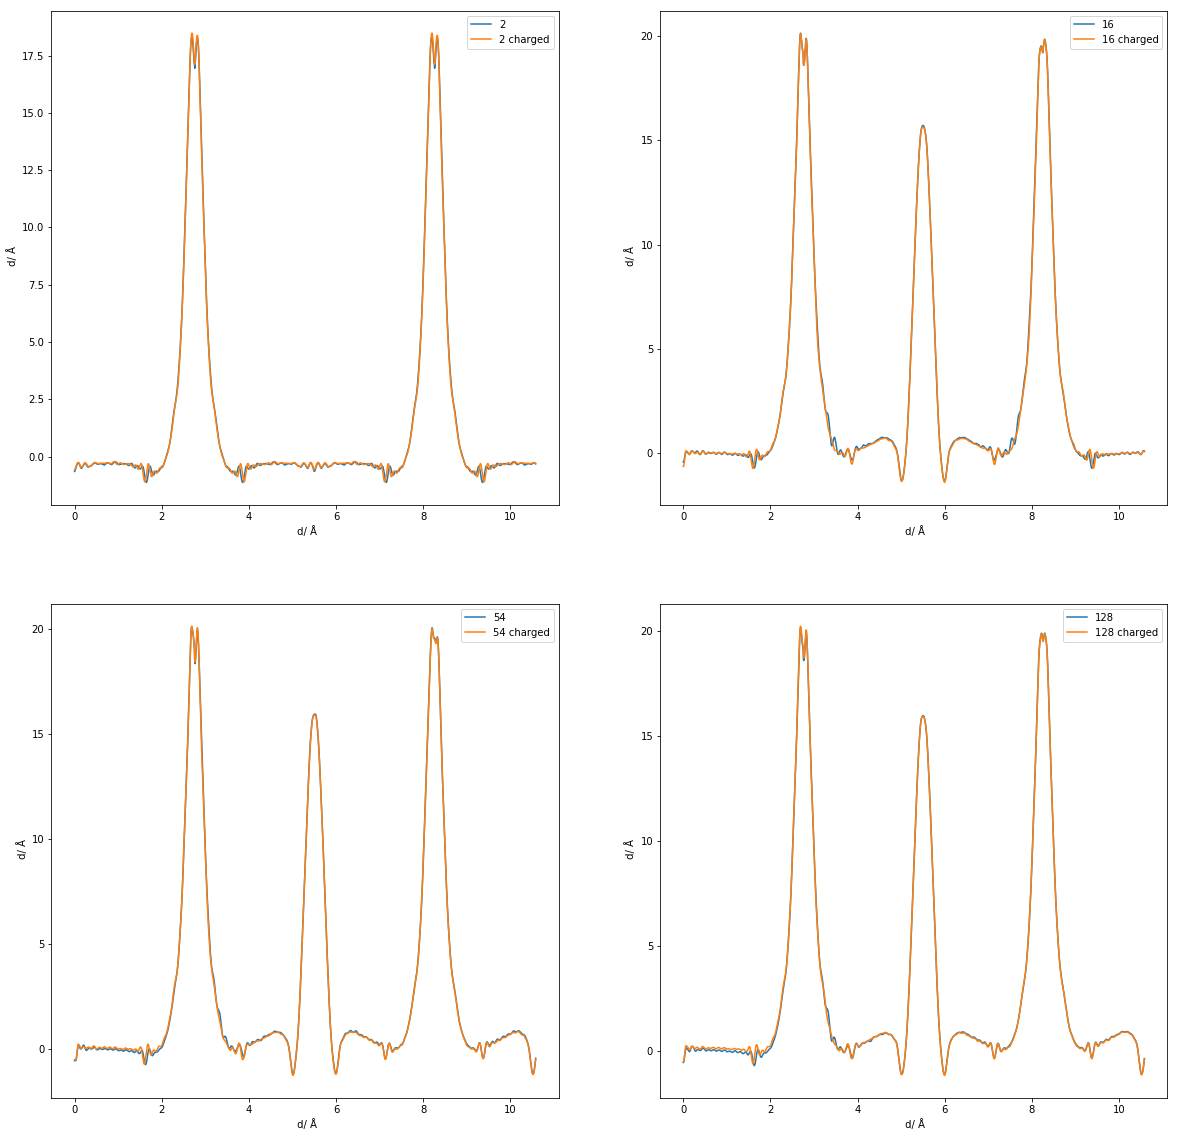

In [11]:
mpl.rcParams['figure.figsize'] = (20,20)
distance_scalar = 20

x0 = map_2.ions[0].pos
x1 = map_16.ions[0].pos
x2 = map_54.ions[0].pos
x3 = map_128.ions[0].pos

r0 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_2.cell)
r1 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_16.cell)
r2 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_54.cell)
r3 = distance_scalar*Coord(pos=[1.0,0.0,0.0], cell=map_128.cell)

print(x1, 'label0', map_2.ions[0].label)
print(x2, 'label1', map_16.ions[0].label)
print(x1, 'label2', map_54.ions[0].label)
print(x2, 'label3', map_128.ions[0].label)

gridpoints = 4000
d0 = (r0).length()*0.52918
d1 = (r1).length()*0.52918
d2 = (r2).length()*0.52918
d3 = (r3).length()*0.52918

scalar0 = d0/gridpoints
scalar1 = d1/gridpoints
scalar2 = d2/gridpoints
scalar3 = d3/gridpoints

xvalues = np.arange(0,gridpoints,1)

fig, axes = plt.subplots(nrows=2, ncols=2)

plotcut_1D_map_2 = map_2.plot.get_plotcut(x0=x0,r0=r0, nr=gridpoints)
plotcut_1D_map_16 = map_16.plot.get_plotcut(x0=x1,r0=r1, nr=gridpoints)
plotcut_1D_map_54 = map_54.plot.get_plotcut(x0=x2,r0=r2, nr=gridpoints)
plotcut_1D_map_128 = map_128.plot.get_plotcut(x0=x3,r0=r3, nr=gridpoints)
plotcut_1D_map_2_charged = map_2_charged.plot.get_plotcut(x0=x0,r0=r0, nr=gridpoints)
plotcut_1D_map_16_charged = map_16_charged.plot.get_plotcut(x0=x1,r0=r1, nr=gridpoints)
plotcut_1D_map_54_charged = map_54_charged.plot.get_plotcut(x0=x2,r0=r2, nr=gridpoints)
plotcut_1D_map_128_charged = map_128_charged.plot.get_plotcut(x0=x3,r0=r3, nr=gridpoints)

axes[0][0].plot(xvalues*scalar0, plotcut_1D_map_2.values, label = '2')
axes[0][1].plot(xvalues*scalar1, plotcut_1D_map_16.values, label = '16')
axes[1][0].plot(xvalues*scalar2, plotcut_1D_map_54.values, label = '54')
axes[1][1].plot(xvalues*scalar3, plotcut_1D_map_128.values, label = '128')

axes[0][0].plot(xvalues*scalar0, plotcut_1D_map_2_charged.values, label = '2 charged')
axes[0][1].plot(xvalues*scalar1, plotcut_1D_map_16_charged.values, label = '16 charged')
axes[1][0].plot(xvalues*scalar2, plotcut_1D_map_54_charged.values, label = '54 charged')
axes[1][1].plot(xvalues*scalar3, plotcut_1D_map_128_charged.values, label = '128 charged')

axes[0][0].set_xlabel(' d/ Å')
axes[0][1].set_xlabel(' d/ Å')
axes[1][0].set_xlabel(' d/ Å')
axes[1][1].set_xlabel(' d/ Å')

axes[0][0].set_ylabel(' d/ Å')
axes[0][1].set_ylabel(' d/ Å')
axes[1][0].set_ylabel(' d/ Å')
axes[1][1].set_ylabel(' d/ Å')

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

plt.show()

## Embedding potential v_emb(r) with rho_N

In [12]:
valence_electrons_Cl = 7
ry_to_ev = 13.6057
v_2 = 281.3014
v_16 = 2250.4112
v_54 = 7595.1378
v_128 = 18003.2895
nnr_2 = 72*72*72
nnr_16 = 135*135*135
nnr_54 = 200*200*200
nnr_128 = 269*269*269 

In [13]:
delta_128 = map_128_charged.plot.get_value_at_points(points=np.asarray([[0.125,0.125,0.125],])) - map_128.plot.get_value_at_points(points=np.asarray([[0.125,0.125,0.125],]))
delta_128*valence_electrons_Cl*(v_128/nnr_128)*ry_to_ev

array([ 0.00333336])

In [14]:
delta_54 = map_54_charged.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.166666666667,0.166666666667],])) - map_54.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.1666666666,0.166666666667],]))
delta_54*valence_electrons_Cl*(v_54/nnr_54)*ry_to_ev

array([ 0.00382113])

In [15]:
delta_16 = map_16_charged.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.166666666667,0.166666666667],])) - map_54.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.1666666666,0.166666666667],]))
delta_16*valence_electrons_Cl*(v_16/nnr_16)*ry_to_ev

array([ 0.05047984])

In [16]:
delta_2 = map_2_charged.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.166666666667,0.166666666667],])) - map_54.plot.get_value_at_points(points=np.asarray([[0.166666666667,0.1666666666,0.166666666667],]))
delta_2*valence_electrons_Cl*(v_2/nnr_2)*ry_to_ev

array([-0.0346752])